In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##### Reading in data from txt file

In [3]:
columns = ['id','clump_thickness','uniformity_size','uniformity_shape','marginal_adhesion','single_epithelial_cell_size','bare_nuclei','bland_chromatin','normmal_nucleoli','mitoses','class']

In [4]:
df = pd.read_csv('breast-cancer-wisconsin.data.txt',header=None)

In [5]:
df.columns = columns

### Data description


   ###  Attribute                     Domain
   -- -----------------------------------------
   1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
  10. Mitoses                       1 - 10
  11. Class:                        (2 for benign, 4 for malignant)
  
5. Number of Instances: 699 (as of 15 July 1992)

6. Number of Attributes: 10 plus the class attribute

8. Missing attribute values: 16

   There are 16 instances in Groups 1 to 6 that contain a single missing 
   (i.e., unavailable) attribute value, now denoted by "?".  

9. Class distribution:
 
   Benign: 458 (65.5%)
   Malignant: 241 (34.5%)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
id                             699 non-null int64
clump_thickness                699 non-null int64
uniformity_size                699 non-null int64
uniformity_shape               699 non-null int64
marginal_adhesion              699 non-null int64
single_epithelial_cell_size    699 non-null int64
bare_nuclei                    699 non-null object
bland_chromatin                699 non-null int64
normmal_nucleoli               699 non-null int64
Mitoses                        699 non-null int64
class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [36]:
df.head(5)

,id,clump_thickness,uniformity_size,uniformity_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normmal_nucleoli,Mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [6]:
# Remove absent values
np.where(df['bare_nuclei'].values == '?')

(array([ 23,  40, 139, 145, 158, 164, 235, 249, 275, 292, 294, 297, 315,
        321, 411, 617]),)

In [7]:
len(np.where(df['bare_nuclei'].values == '?')[0])

16

In [8]:
# double check how many classes 
np.unique(df['class'])

array([2, 4])

### Exploratory Data Analysis

In [11]:
df1 = df.copy()

In [12]:
df1 = df1.drop(np.where(df['bare_nuclei'].values == '?')[0],axis = 0)

In [14]:
df1 = df1.astype(int)

In [209]:
len(df1)

683

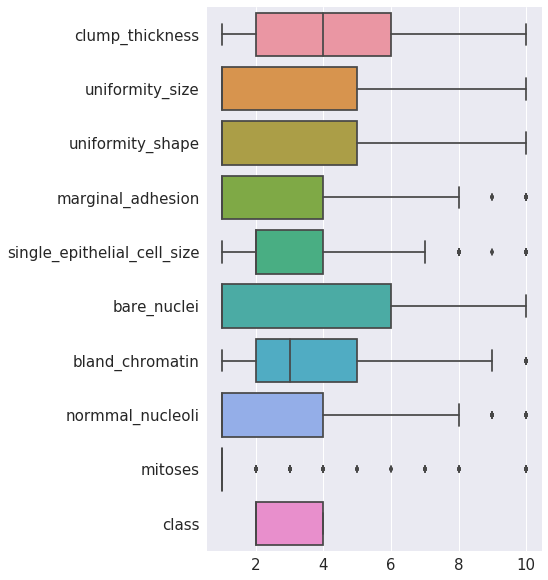

In [210]:
plt.figure(figsize = (6,10))
sns.boxplot(data = df1.iloc[:,1:],orient = 'h')
sns.set(font_scale=1.5)

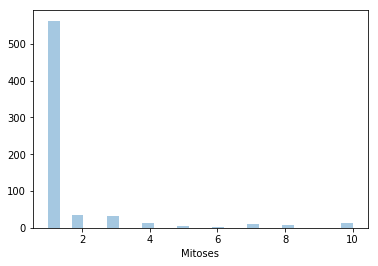

In [80]:
sns.distplot(df1['Mitoses'],kde = False)

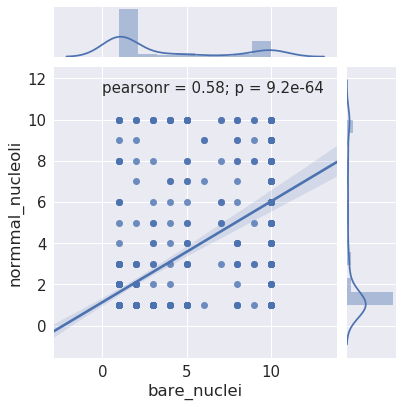

In [169]:
sns.jointplot(x='bare_nuclei',y='normmal_nucleoli',data=df1,kind = 'reg')

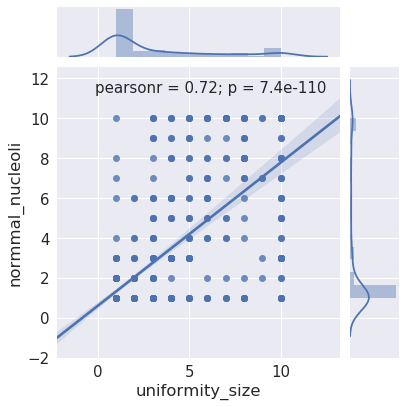

In [168]:
sns.jointplot(x='uniformity_size',y='normmal_nucleoli',data=df1,kind = 'reg')

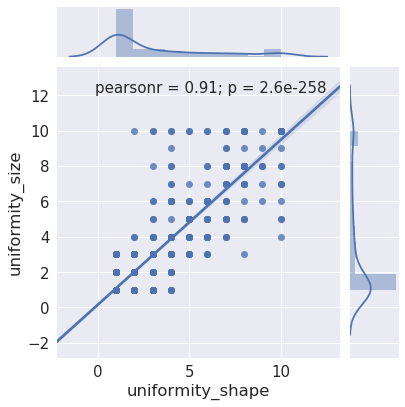

In [175]:
sns.jointplot(x='uniformity_shape',y='uniformity_size',data=df1,kind = 'reg')

### Prepare data for classification

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold
from sklearn.svm import LinearSVC,SVC
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

In [78]:
from sklearn.model_selection import cross_val_score

In [16]:
X = df1.iloc[:,1:-1].values
y = df1.iloc[:,-1].values

In [91]:
scaler = StandardScaler()
scaler.fit(X)
X_norm = scaler.transform(X)

/home/miracle/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [105]:
X_train,X_test,y_train,y_test = train_test_split(X_norm,y,test_size = 0.3, random_state = 101)

### SVM Classifier

In [112]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['linear']} 
grid = GridSearchCV(SVC(probability=True),param_grid,refit=True,verbose=1,cv = 10)

In [113]:
grid.fit(X_norm,y)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  1.4min finished


GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['linear']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [114]:
grid.cv_results_

/home/miracle/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/miracle/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/miracle/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/miracle/anaconda3/lib/py

{'mean_fit_time': array([ 0.00694191,  0.00581899,  0.0058378 ,  0.00580268,  0.00583014,
         0.01057105,  0.01137676,  0.01049936,  0.01098273,  0.01061265,
         0.02599819,  0.02662749,  0.02599199,  0.02491081,  0.02468433,
         0.18968322,  0.16320429,  0.15379493,  0.16231928,  0.16825187,
         1.43949192,  1.65461435,  1.44973238,  1.33782935,  1.43741727]),
 'mean_score_time': array([ 0.00049522,  0.0004617 ,  0.00048628,  0.0004473 ,  0.00040066,
         0.00045462,  0.00043571,  0.00046318,  0.00047548,  0.00046375,
         0.00045702,  0.00044887,  0.00048411,  0.00053506,  0.00043464,
         0.00041459,  0.00058794,  0.00045691,  0.00042522,  0.0004442 ,
         0.00050886,  0.00046489,  0.00059521,  0.000543  ,  0.0004895 ]),
 'mean_test_score': array([ 0.96925329,  0.96925329,  0.96925329,  0.96925329,  0.96925329,
         0.96632504,  0.96632504,  0.96632504,  0.96632504,  0.96632504,
         0.96486091,  0.96486091,  0.96486091,  0.96486091,  0.96

In [120]:
np.average(grid.cv_results_['mean_test_score'])

0.96573938506588575

In [121]:
np.std(grid.cv_results_['mean_test_score'])

0.0019860409906662557

In [122]:
grid.best_score_

0.96925329428989748

In [123]:
grid.best_estimator_

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [124]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [118]:
y_pred = grid.best_estimator_.predict(X_test)

In [119]:
print(metrics.classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          2       0.98      1.00      0.99       130
          4       1.00      0.97      0.99        75

avg / total       0.99      0.99      0.99       205



In [125]:
grid.best_estimator_.coef_

array([[ 0.46895433,  0.05851666,  0.40483161,  0.16978133,  0.23709585,
         0.58587217,  0.37222406,  0.19411214,  0.29495804]])

### SVM with balanced classes

In [17]:
idx_2 = np.where(y == 2)[0]
idx_4 = np.where(y == 4)[0]

In [18]:
print(len(idx_2))
print(len(idx_4))

444
239


In [19]:
X_2 = X[idx_2,:]
X_4 = X[idx_4,:]

In [20]:
idx_2_new = np.random.choice(range(len(idx_2)),size = len(idx_4),replace=False)

In [23]:
X1 = np.vstack((X_2[idx_2_new,:],X_4))
y = np.hstack((np.ones(len(idx_2_new))*2,np.ones(len(idx_2_new))*4))
y = np.array(y,dtype=int)

In [89]:
Xy = np.hstack((X1,y.reshape(-1,1)))
np.random.shuffle(Xy)
X2 = Xy[:,:-2]
# X2 = Xy[:,:-1]
y2 = Xy[:,-1]
y2 = np.array(y2,dtype=int)

In [98]:
y2[y2==2] = 0
y2[y2==4] = 1

In [90]:
scaler2 = StandardScaler()
scaler2.fit(X2)
X2_norm = scaler2.transform(X2)

/home/miracle/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [117]:
X2_train,X2_test,y2_train,y2_test = train_test_split(X2_norm,y2,test_size = 0.3, random_state = 42)

In [101]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001], 'kernel': ['linear']} 
grid2 = GridSearchCV(SVC(probability=True),param_grid,verbose=1,cv = 10,return_train_score=True,scoring='f1')

In [102]:
grid2.fit(X2_train,y2_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    2.2s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['linear']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=1)

In [59]:
grid2.best_estimator_

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [211]:
print('Average F1 Score:',np.average(grid2.cv_results_['mean_test_score']))

Average F1 Score: 0.961921583885


In [212]:
print('STD F1 Score',np.average(grid2.cv_results_['std_test_score']))

STD F1 Score 0.0241130055817


In [106]:
grid2.best_score_

0.96878501062391342

In [114]:
grid2.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['linear']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=1)>

In [119]:
cross_val_score(grid2.best_estimator_, X2_test, y2_test, cv=10,scoring = 'f1')

array([ 0.85714286,  0.93333333,  1.        ,  1.        ,  1.        ,
        0.92307692,  1.        ,  1.        ,  1.        ,  0.85714286])

In [213]:
print('Average F1 Score on validation set',np.average(cross_val_score(grid2.best_estimator_, X2_test, y2_test, cv=10,scoring = 'f1')))

Average F1 Score on validation set 0.95706959707


In [214]:
print('STD F1 Score on validation set',np.std(cross_val_score(grid2.best_estimator_, X2_test, y2_test, cv=10,scoring = 'f1')))

STD F1 Score on validation set 0.0572256374195


In [217]:
print('AUC on validation data set',np.average(cross_val_score(grid2.best_estimator_, X2_test, y2_test, cv=10,scoring = 'roc_auc')))

AUC on validation data set 0.997959183673


### Feature importance

In [112]:
feature_names = df1.columns[1:-2]
feature_names.shape

(8,)

In [126]:
df_feature = pd.DataFrame(feature_names,columns=['feature'])

In [128]:
df_feature['weight'] = grid2.best_estimator_.coef_[0]

In [133]:
df_feature = df_feature.sort_values(by=['weight'],ascending=False)

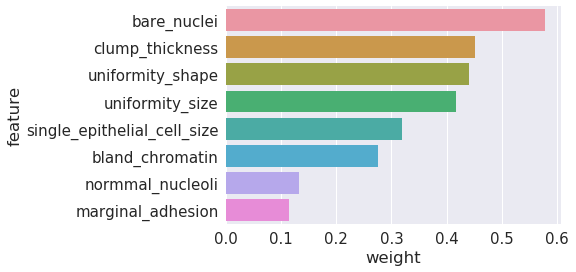

In [150]:
sns.barplot(x = 'weight',y = 'feature',data = df_feature)
sns.set(font_scale=1.5)